In [2]:
#Import Libraries
import time
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.contrib import keras
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Dense, Activation
from tensorflow.contrib.keras.api.keras.optimizers import SGD
from tensorflow.contrib.keras.python.keras.utils import np_utils

In [3]:
#import keras layers for CNN
from tensorflow.contrib.keras.api.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [4]:
#Load MNIST Data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_features=mnist.train.images
train_labels=mnist.train.labels
test_features=mnist.test.images
test_labels=mnist.test.labels
img_rows=28
img_cols=28

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [5]:
#Reshape input vectors to match CNN
x_train = np.reshape(train_features, (train_features.shape[0], img_rows, img_cols,1))
x_test = np.reshape(test_features, (test_features.shape[0], img_rows, img_cols,1))
input_shape = (img_rows, img_cols,1)

In [6]:
#Number of output classes
num_classes = len(np.unique(train_labels))

In [7]:
#Output Labels
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (55000, 28, 28, 1))
(55000, 'train samples')
(10000, 'test samples')


In [8]:
# Define a deep neural network
# Two Convolutional Layers (3x3 kernel) + Relu
# MaxPool
# Dropout
# Flatten + Output layer
def conv_nn():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [9]:
# Accuracy = percentage of mispredicted images, mispredicted samples
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    bad_images=(predicted_class != true_class)
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100, bad_images, predicted_class, true_class)

In [10]:
#Plot training history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [11]:
#Plot samples from misclassified images
def plot_bad_images(images, bad_img, bad_labels, true_labels):
    n = sum(bad_img)
    print("There are: %d mispredicted images"%n)
    bad_image_indices = []
    num_bad=0
    for j in range(bad_img.shape[0]):
        if bad_img[j]==True:
            bad_image_indices.append(j)
            num_bad +=1

    fig1 = plt.figure(figsize=(15,20))
    for j in range(50):
        ax = fig1.add_subplot(10, 10, j+1)
        js=np.random.randint(0,num_bad)
        j1=bad_image_indices[js]
        p=np.reshape(images[j1],(-1,28))
        ax.imshow(p, cmap = "gray")
        ax.set_title(str(bad_labels[j1])+"/"+str(true_labels[j1]))
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

    plt.show()

In [12]:
#Print model parameters
model = conv_nn()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [13]:
#Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
	optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [14]:
# Train model
start = time.time()
model_info = model.fit(x_train, y_train, batch_size=64, epochs=50, verbose=2, validation_split=0.1)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))

Train on 49500 samples, validate on 5500 samples
Epoch 1/50
9s - loss: 0.3041 - acc: 0.9071 - val_loss: 0.0695 - val_acc: 0.9824
Epoch 2/50
5s - loss: 0.1103 - acc: 0.9668 - val_loss: 0.0510 - val_acc: 0.9867
Epoch 3/50
5s - loss: 0.0847 - acc: 0.9752 - val_loss: 0.0462 - val_acc: 0.9873
Epoch 4/50
5s - loss: 0.0707 - acc: 0.9791 - val_loss: 0.0444 - val_acc: 0.9869
Epoch 5/50
5s - loss: 0.0610 - acc: 0.9823 - val_loss: 0.0443 - val_acc: 0.9895
Epoch 6/50
5s - loss: 0.0558 - acc: 0.9836 - val_loss: 0.0374 - val_acc: 0.9900
Epoch 7/50
5s - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0405 - val_acc: 0.9895
Epoch 8/50
5s - loss: 0.0489 - acc: 0.9852 - val_loss: 0.0388 - val_acc: 0.9891
Epoch 9/50
5s - loss: 0.0446 - acc: 0.9868 - val_loss: 0.0355 - val_acc: 0.9889
Epoch 10/50
5s - loss: 0.0441 - acc: 0.9871 - val_loss: 0.0343 - val_acc: 0.9911
Epoch 11/50
5s - loss: 0.0419 - acc: 0.9871 - val_loss: 0.0354 - val_acc: 0.9911
Epoch 12/50
5s - loss: 0.0394 - acc: 0.9883 - val_loss: 0.0388 - val_

In [15]:
# compute test accuracy
acc,bad_img, bad_labels, true_labels=accuracy(x_test, y_test, model)
print ("Accuracy on test data is: %0.2f"%acc)

Accuracy on test data is: 99.02


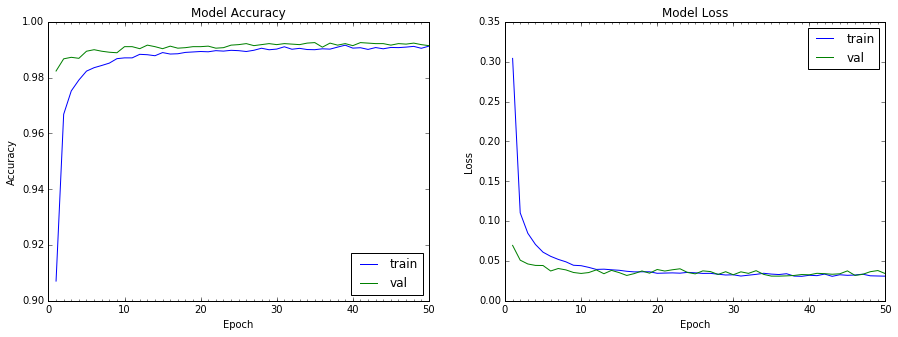

In [16]:
# plot model history
plot_model_history(model_info)

There are: 98 mispredicted images


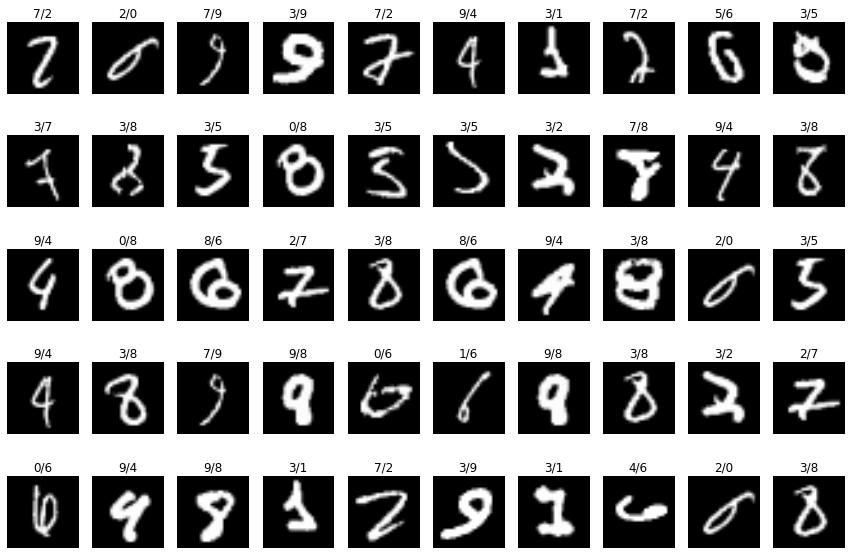

In [17]:
# display some misclassified images
plot_bad_images(test_features,bad_img, bad_labels,true_labels)